# Spotify Dataset Exploration

This notebook performs initial data inspection on the Spotify datasets, including loading, examining structure, checking for missing values, and identifying duplicates.

## Import Required Libraries

Import necessary libraries for data analysis and exploration.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")

Matplotlib is building the font cache; this may take a moment.


## Load Dataset Using Pandas

Load the CSV datasets from the archive folder.

In [10]:
# Define archive folder path
archive_path = Path('../data/raw/archive')

# Load tracks dataset
tracks_df = pd.read_csv(archive_path / 'tracks.csv')
print("Tracks dataset loaded successfully!")
print(f"Shape: {tracks_df.shape}\n")
print("First few rows of tracks dataset:")
tracks_df.head()

Tracks dataset loaded successfully!
Shape: (586672, 20)

First few rows of tracks dataset:


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## Inspect Columns and Data Types

Examine the structure of the datasets, including column names and their data types.

In [11]:
print("=" * 80)
print("TRACKS DATASET STRUCTURE")
print("=" * 80)
print("\nData Types:")
print(tracks_df.dtypes)
print("\nDataset Info:")
tracks_df.info()
print("\nColumn Summary:")
print(f"Total Columns: {len(tracks_df.columns)}")
print(f"\nColumns: {list(tracks_df.columns)}")

TRACKS DATASET STRUCTURE

Data Types:
id                      str
name                    str
popularity            int64
duration_ms           int64
explicit              int64
artists                 str
id_artists              str
release_date            str
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  str    
 1   name              586601 non-null  str    
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non

## Check Dataset Size

Display the shape and dimensions of both datasets.

In [13]:
print("=" * 80)
print("DATASET DIMENSIONS")
print("=" * 80)
print(f"\nTracks Dataset:")
print(f"  - Rows: {tracks_df.shape[0]:,}")
print(f"  - Columns: {tracks_df.shape[1]}")
print(f"  - Total cells: {tracks_df.shape[0] * tracks_df.shape[1]:,}")


DATASET DIMENSIONS

Tracks Dataset:
  - Rows: 586,672
  - Columns: 20
  - Total cells: 11,733,440


## Identify Missing Values

Check for and visualize missing values in both datasets.

MISSING VALUES - TRACKS DATASET

Missing Values Summary:
Column  Missing Count  Percentage
  name             71    0.012102


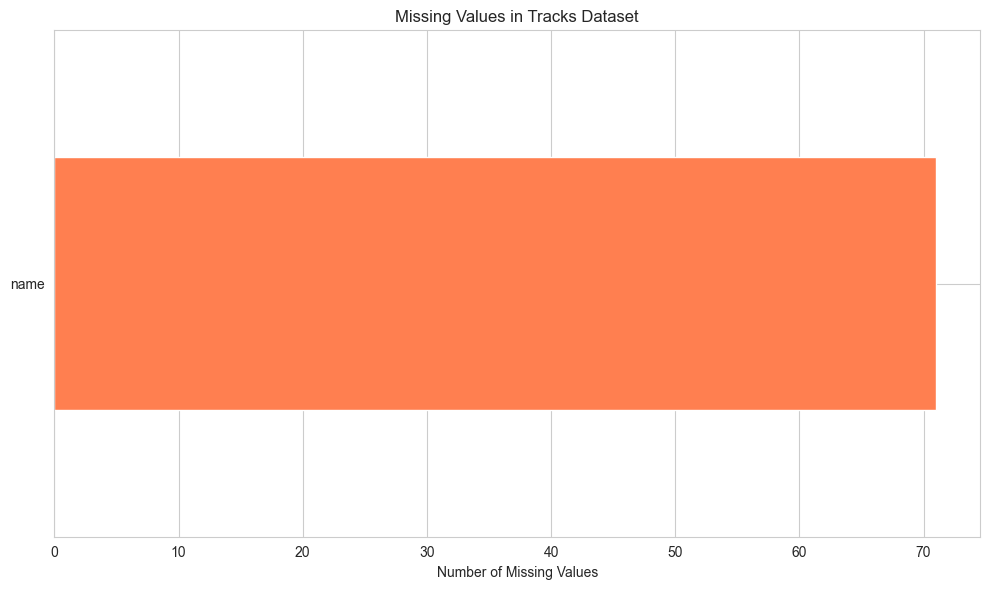

In [14]:
print("=" * 80)
print("MISSING VALUES - TRACKS DATASET")
print("=" * 80)

missing_tracks = tracks_df.isnull().sum()
missing_tracks_pct = (missing_tracks / len(tracks_df)) * 100

missing_tracks_df = pd.DataFrame({
    'Column': missing_tracks.index,
    'Missing Count': missing_tracks.values,
    'Percentage': missing_tracks_pct.values
})
missing_tracks_df = missing_tracks_df[missing_tracks_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_tracks_df) == 0:
    print("\nNo missing values found in tracks dataset!")
else:
    print("\nMissing Values Summary:")
    print(missing_tracks_df.to_string(index=False))

# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 6))
missing_counts = tracks_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
if len(missing_counts) > 0:
    missing_counts.plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Number of Missing Values')
    ax.set_title('Missing Values in Tracks Dataset')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values to visualize.")

## Identify Duplicate Rows

Check for duplicate rows in both datasets.

In [15]:
print("=" * 80)
print("DUPLICATE ROWS - TRACKS DATASET")
print("=" * 80)

# Check for complete duplicate rows
duplicate_rows_tracks = tracks_df.duplicated().sum()
print(f"\nTotal completely duplicate rows: {duplicate_rows_tracks}")

# Check for duplicates based on first column (usually ID)
if len(tracks_df.columns) > 0:
    first_col = tracks_df.columns[0]
    duplicate_ids = tracks_df[first_col].duplicated().sum()
    print(f"Duplicate values in '{first_col}': {duplicate_ids}")

if duplicate_rows_tracks > 0:
    print("\nSample of duplicate rows:")
    duplicate_mask = tracks_df.duplicated(keep=False)
    print(tracks_df[duplicate_mask].sort_values(by=list(tracks_df.columns[:2])).head(10))
else:
    print("\nNo complete duplicate rows found.")

DUPLICATE ROWS - TRACKS DATASET

Total completely duplicate rows: 0
Duplicate values in 'id': 0

No complete duplicate rows found.
